In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from modules.utils import SYMPTOM_COLUMNS
from modules.model import LamposExtendedModel
from modules.eval import *
from modules.plot import *

%load_ext autoreload
%autoreload 2

In [2]:
rsv_df = pd.read_csv("./datasets/combined.csv")

In [3]:
rsv_df

,date,symptom:ageusia,symptom:anosmia,symptom:chills,symptom:cough,symptom:diarrhea,symptom:fatigue,symptom:fever,symptom:headache,symptom:muscle weakness,...,symptom:nausea,symptom:shortness of breath,symptom:sore throat,symptom:vomiting,daily_new_positives,cumulative_positives,num_daily_tests,cumulative_tests,test_positivity_rate,symptom:combined
0,2021-01-01,0.32,0.37,0.30,3.75,3.50,3.72,3.49,4.49,0.16,...,2.12,0.65,1.40,2.85,15074,1005785,202446,25706759,0.0745,14.8431
1,2021-01-02,0.36,0.42,0.30,3.90,3.38,3.95,3.65,4.08,0.16,...,1.90,0.69,1.43,2.40,11368,1017153,142345,25849104,0.0799,14.8717
2,2021-01-03,0.34,0.46,0.29,3.88,3.39,4.03,3.69,3.83,0.17,...,1.84,0.70,1.40,2.37,11209,1028362,134360,25983464,0.0834,14.7662
3,2021-01-04,0.28,0.34,0.31,3.93,3.37,4.34,4.00,3.93,0.22,...,1.85,0.77,1.42,2.27,12666,1041028,152402,26135866,0.0831,15.3282
4,2021-01-05,0.27,0.32,0.33,3.98,3.38,4.42,4.11,4.31,0.22,...,1.81,0.74,1.40,2.14,16648,1057676,197816,26333682,0.0842,15.6898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,0.30,0.41,0.59,11.15,4.21,4.14,8.29,4.26,0.19,...,2.26,0.80,4.22,3.26,40780,3251712,210996,87447878,0.1933,27.0476
361,2021-12-28,0.31,0.43,0.63,11.92,4.18,4.41,9.06,4.57,0.21,...,2.27,0.82,4.36,3.19,67090,3318802,362594,87810472,0.1850,28.7918
362,2021-12-29,0.33,0.43,0.58,11.88,4.15,4.29,8.78,4.48,0.20,...,2.29,0.83,4.36,3.15,74207,3393009,336469,88146941,0.2205,28.3798
363,2021-12-30,0.34,0.43,0.53,11.46,4.12,4.11,8.28,4.46,0.20,...,2.25,0.83,4.22,3.06,76555,3469564,339853,88486794,0.2253,27.3794


In [4]:
media_df = pd.read_csv("./datasets/media_count_ratio_all_2021.csv")

In [5]:
media_df

,date,symptom:ageusia,symptom:anosmia,symptom:chills,symptom:cough,symptom:diarrhea,symptom:fatigue,symptom:fever,symptom:headache,symptom:loss of smell,symptom:loss of taste,symptom:muscle weakness,symptom:nasal congestion,symptom:nausea,symptom:shortness of breath,symptom:sore throat,symptom:vomiting,symptom:combined,daily_new_positives
0,2021-01-01,0.0,0.000000,0.001309,0.002618,0.001745,0.006981,0.010471,0.002182,0.000000,0.000873,0.0,0.0,0.000000,0.002182,0.000436,0.002618,0.019437,15074
1,2021-01-02,0.0,0.000604,0.000000,0.004831,0.000604,0.019928,0.003019,0.000000,0.001208,0.000604,0.0,0.0,0.000000,0.000604,0.000000,0.001208,0.019680,11368
2,2021-01-03,0.0,0.000000,0.002271,0.002839,0.000000,0.005679,0.007382,0.002839,0.000568,0.001136,0.0,0.0,0.000000,0.001136,0.000000,0.000000,0.015565,11209
3,2021-01-04,0.0,0.000000,0.002441,0.002197,0.000244,0.004150,0.005371,0.002441,0.000000,0.000488,0.0,0.0,0.001465,0.001465,0.000488,0.000244,0.013347,12666
4,2021-01-05,0.0,0.000000,0.001320,0.001320,0.000660,0.007038,0.004838,0.001539,0.001539,0.000660,0.0,0.0,0.001539,0.001320,0.001320,0.000880,0.013250,16648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,0.0,0.000000,0.039474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.024868,40780
361,2021-12-28,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,67090
362,2021-12-29,0.0,0.000000,0.000000,0.025641,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.025641,0.000000,0.000000,0.056667,74207
363,2021-12-30,0.0,0.000000,0.000000,0.000000,0.007143,0.007143,0.028571,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.007143,0.007143,0.033786,76555


In [6]:
symptoms_list = SYMPTOM_COLUMNS.copy()
symptom_col_header = "symptom:combined"
case_col_header = "daily_new_positives"
case_data = rsv_df[[case_col_header]]

In [7]:
results_df = pd.concat(
    [rsv_df["date"], rsv_df[symptom_col_header], media_df[symptom_col_header]], axis=1
)
results_df.columns = ["date", "rsv", "media"]

/var/folders/zl/yc2y215n1d3gj37jjg_cv5dr0000gn/T/ipykernel_57265/2147276637.py:17: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  [results_df["date"], results_df.rolling(7).mean()], axis=1


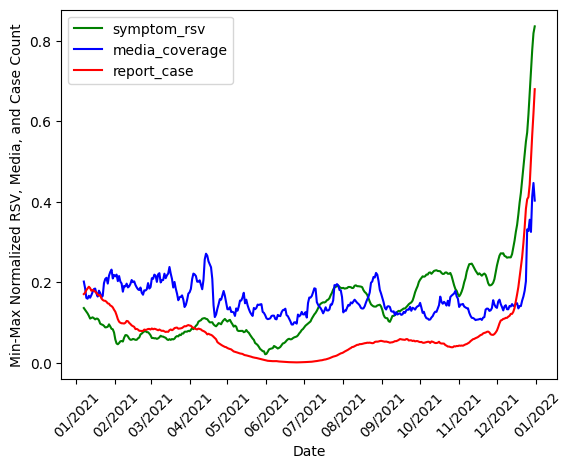

In [8]:
results_df = pd.concat(
    [
        rsv_df["date"],
        rsv_df[symptom_col_header],
        media_df[symptom_col_header],
        rsv_df[case_col_header],
    ],
    axis=1,
)
results_df.columns = ["date", "rsv", "media", "case"]

results_df["date"] = pd.to_datetime(results_df["date"])

results_df["rsv"] = MinMaxScaler().fit_transform(results_df[["rsv"]]).flatten()
results_df["media"] = MinMaxScaler().fit_transform(results_df[["media"]]).flatten()
results_df["case"] = MinMaxScaler().fit_transform(results_df[["case"]]).flatten()

results_df = pd.concat([results_df["date"], results_df.rolling(7).mean()], axis=1)
results_df["date"] = pd.to_datetime(results_df["date"])

plt.plot(
    results_df["date"],
    results_df["rsv"].astype(float),
    label="symptom_rsv",
    color="green",
)
plt.plot(
    results_df["date"],
    results_df["media"].astype(float),
    label="media_coverage",
    color="blue",
)
plt.plot(
    results_df["date"],
    results_df["case"].astype(float),
    label="report_case",
    color="red",
)
plt.xlabel("Date")
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%m/%Y"))
plt.xticks(rotation=45)
plt.ylabel("Min-Max Normalized RSV, Media, and Case Count")
plt.show()

# Without Denoising

/Users/andrewchen/VSCodeProjects/epi-project/modules/plot.py:182: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  [results_df["date"], results_df.rolling(rolling_window).mean()], axis=1


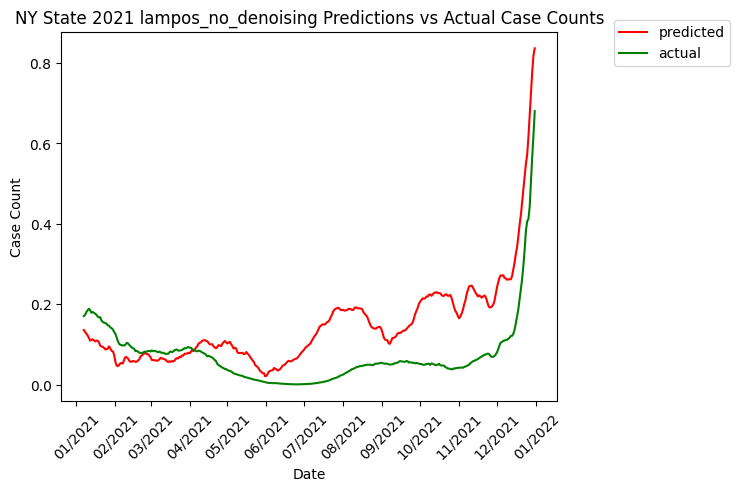

{'rmse': 11894.054807832963,
 'dtw distance': 10.286752554370572,
 'pearson statistic': 0.757865899315238,
 'pearson p-value': 2.58396251015463e-69,
 'spearman rho': 0.19993978620403194,
 'spearman p-value': 0.00012023716110326492}

In [9]:
# Plot the original RSV with the case counts with MinMaxScaling
exp_name = "lampos_no_denoising"
base_results_df = get_model_results(
    rsv_df[symptom_col_header], rsv_df[case_col_header], exp_name, media=True, save=True
)
base_results_df["date"] = pd.to_datetime(base_results_df["date"])
# base_results_df = base_results_df[(base_results_df["date"].dt.month >= ) & (base_results_df["date"].dt.month <= )]
base_results_df["predicted_case_count"] = (
    MinMaxScaler().fit_transform(base_results_df[["predicted_case_count"]]).flatten()
)
base_results_df["actual_case_count"] = (
    MinMaxScaler().fit_transform(base_results_df[["actual_case_count"]]).flatten()
)
plot_predictions_actual(base_results_df, exp_name, rolling=True)
run_eval_suite_default(rsv_df[symptom_col_header], rsv_df[case_col_header])

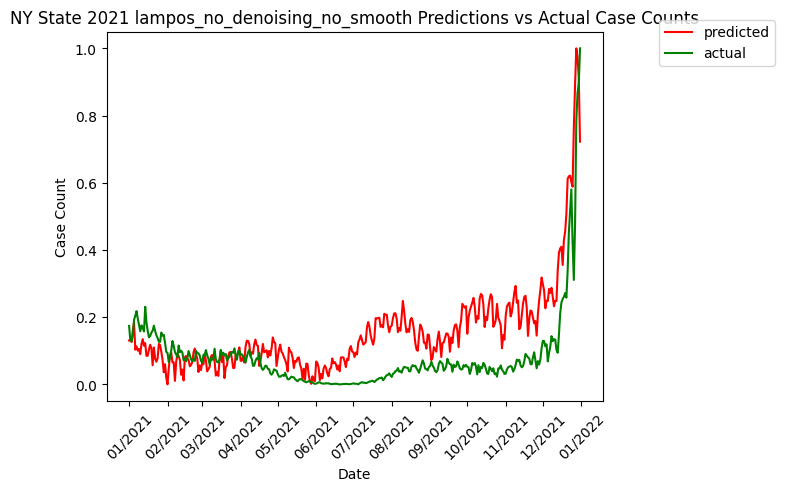

{'rmse': 11894.054807832963,
 'dtw distance': 10.286752554370572,
 'pearson statistic': 0.757865899315238,
 'pearson p-value': 2.58396251015463e-69,
 'spearman rho': 0.19993978620403194,
 'spearman p-value': 0.00012023716110326492}

In [10]:
# Plot the original RSV with the case counts with MinMaxScaling
exp_name = "lampos_no_denoising_no_smooth"
base_results_df = get_model_results(
    rsv_df[symptom_col_header], rsv_df[case_col_header], exp_name, media=True, save=True
)
base_results_df["predicted_case_count"] = (
    MinMaxScaler().fit_transform(base_results_df[["predicted_case_count"]]).flatten()
)
base_results_df["actual_case_count"] = (
    MinMaxScaler().fit_transform(base_results_df[["actual_case_count"]]).flatten()
)
plot_predictions_actual(base_results_df, exp_name, rolling=False)
run_eval_suite_default(rsv_df[symptom_col_header], rsv_df[case_col_header])

# Lampos Model

In [11]:
# Apply ExtendedLamposModel to denoise current day RSV data with <k> days of past RSV and media data as predictor variables
def extended_lampos(
    rsv_df=rsv_df, media_df=media_df, col_header=symptom_col_header, k=2
):
    # Prepare data
    X_g, X_m, X_g_headers, X_m_headers = [], [], [], []
    for i in range(k):
        x_g = rsv_df[col_header][i : -k + i].reset_index(drop=True)
        x_m = media_df[col_header][i : -k + i].reset_index(drop=True)
        X_g.append(x_g)
        X_m.append(x_m)
        X_g_headers.append("g_prev_" + str(i + 1))
        X_m_headers.append("m_prev_" + str(i + 1))
    X = pd.concat(X_g + X_m, axis=1)
    X.columns = X_g_headers + X_m_headers
    y = rsv_df[col_header][k:].reset_index(drop=True).to_frame()
    y.columns = ["y"]
    # Fit model
    model = LamposExtendedModel()
    model.fit(X, y)
    denoised_y = model.predict(X, y)
    y_flat = y.to_numpy().flatten()
    return denoised_y, y_flat  # Returns the denoised and original RSV

In [12]:
def calc_best_k_all_metrics(
    rsv_df=rsv_df,
    media_df=media_df,
    case_data=case_data,
    col_header=symptom_col_header,
    max_k=30,
):
    """Calculate best k between 1 and max_k days for all eval suite metrics for denoising RSV given RSV and media data.

    Args:
        rsv_df (pd.DataFrame): RSV data
        media_df (pd.DataFrame): Media data
        case_data (pd.DataFrame): Case data
        col_header (str): Column header used by both RSV and media data
        max_k (int): Maximum k to test

    Returns:
        best_ks: Dictionary of best k for different metrics
        best_scores: Dictionary of best k for different metrics corresponding to best k
    """

    scores_dict = {
        "rmse": [],
        "dtw distance": [],
        "pearson statistic": [],
        "pearson p-value": [],
        "spearman rho": [],
        "spearman p-value": [],
    }
    for k in range(1, max_k):
        denoise_rsv, _ = extended_lampos(rsv_df, media_df, col_header, k)
        case_values = case_data[k:].to_numpy().flatten()
        out = run_eval_suite_default(denoise_rsv, case_values)
        for metric in out:
            scores_dict[metric].append(out[metric])
    best_ks = {}
    best_scores = {}
    for metric, scores in scores_dict.items():
        scores = np.array(scores)
        if metric == "pearson statistic" or metric == "spearman rho":
            best_ks[metric] = np.argmax(scores) + 1
            best_scores[metric] = np.max(scores)
        else:
            best_ks[metric] = np.argmin(scores) + 1
            best_scores[metric] = np.min(scores)
    return best_ks, best_scores

## Test Standard Lampos Model (k = 2 days)

/Users/andrewchen/VSCodeProjects/epi-project/modules/plot.py:182: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  [results_df["date"], results_df.rolling(rolling_window).mean()], axis=1


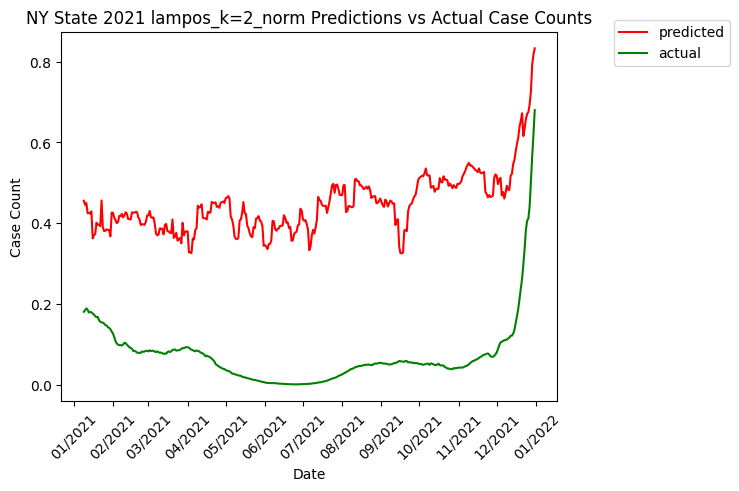

{'rmse': 11886.481855600894,
 'dtw distance': 111.36621957154259,
 'pearson statistic': 0.48793610171648594,
 'pearson p-value': 4.1233262732880805e-23,
 'spearman rho': 0.16672224689553578,
 'spearman p-value': 0.0014332497189857517}

In [13]:
k = 2
exp_name = "lampos_k={}_norm".format(k)
case_values = case_data[k:].to_numpy().flatten()
denoise_rsv, rsv = extended_lampos(k=k)
results_2_df = get_model_results(
    denoise_rsv, case_values, exp_name, media=True, save=True
)
results_2_df["predicted_case_count"] = (
    MinMaxScaler().fit_transform(results_2_df[["predicted_case_count"]]).flatten()
)
results_2_df["actual_case_count"] = (
    MinMaxScaler().fit_transform(results_2_df[["actual_case_count"]]).flatten()
)
plot_predictions_actual(results_2_df, exp_name, rolling=True)
run_eval_suite_default(denoise_rsv, case_values)

## Search for Best k for Lampos Model

In [14]:
calc_best_k_all_metrics()

({'rmse': 29,
  'dtw distance': 29,
  'pearson statistic': 1,
  'pearson p-value': 1,
  'spearman rho': 5,
  'spearman p-value': 5},
 {'rmse': 11668.071808044175,
  'dtw distance': 84.57259654430993,
  'pearson statistic': 0.5179685428280272,
  'pearson p-value': 2.2386828934558217e-26,
  'spearman rho': 0.1923241261453687,
  'spearman p-value': 0.0002418602993985313})

/Users/andrewchen/VSCodeProjects/epi-project/modules/plot.py:182: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  [results_df["date"], results_df.rolling(rolling_window).mean()], axis=1


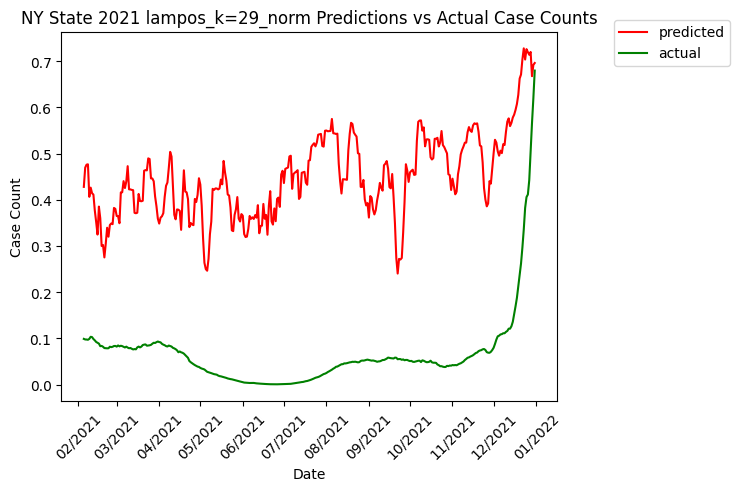

{'rmse': 11668.071808044175,
 'dtw distance': 84.57259654430993,
 'pearson statistic': 0.2967195708628454,
 'pearson p-value': 2.9557113520060006e-08,
 'spearman rho': 0.14348171905436236,
 'spearman p-value': 0.008440938586466391}

In [15]:
k = 29
exp_name = "lampos_k={}_norm".format(k)
case_values = case_data[k:].to_numpy().flatten()
denoise_rsv, rsv = extended_lampos(k=k)
results_29_df = get_model_results(
    denoise_rsv, case_values, exp_name, media=True, save=True
)
results_29_df["predicted_case_count"] = (
    MinMaxScaler().fit_transform(results_29_df[["predicted_case_count"]]).flatten()
)
results_29_df["actual_case_count"] = (
    MinMaxScaler().fit_transform(results_29_df[["actual_case_count"]]).flatten()
)
plot_predictions_actual(results_29_df, exp_name, rolling=True)
run_eval_suite_default(denoise_rsv, case_values)

/Users/andrewchen/VSCodeProjects/epi-project/modules/plot.py:182: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  [results_df["date"], results_df.rolling(rolling_window).mean()], axis=1


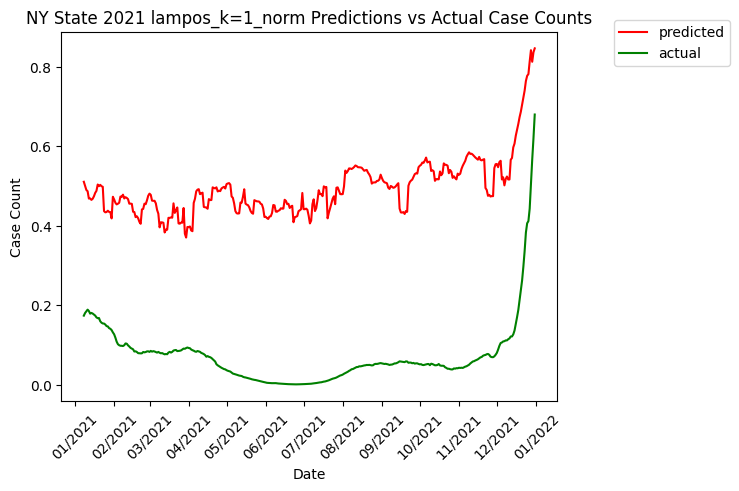

{'rmse': 11884.866096031315,
 'dtw distance': 125.7253002616107,
 'pearson statistic': 0.5179685428280272,
 'pearson p-value': 2.2386828934558217e-26,
 'spearman rho': 0.1866845284330381,
 'spearman p-value': 0.0003422893365475268}

In [16]:
k = 1
exp_name = "lampos_k={}_norm".format(k)
case_values = case_data[k:].to_numpy().flatten()
denoise_rsv, rsv = extended_lampos(k=k)
results_1_df = get_model_results(
    denoise_rsv, case_values, exp_name, media=True, save=True
)
results_1_df["predicted_case_count"] = (
    MinMaxScaler().fit_transform(results_1_df[["predicted_case_count"]]).flatten()
)
results_1_df["actual_case_count"] = (
    MinMaxScaler().fit_transform(results_1_df[["actual_case_count"]]).flatten()
)
plot_predictions_actual(results_1_df, exp_name, rolling=True)
run_eval_suite_default(denoise_rsv, case_values)

/Users/andrewchen/VSCodeProjects/epi-project/modules/plot.py:182: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  [results_df["date"], results_df.rolling(rolling_window).mean()], axis=1


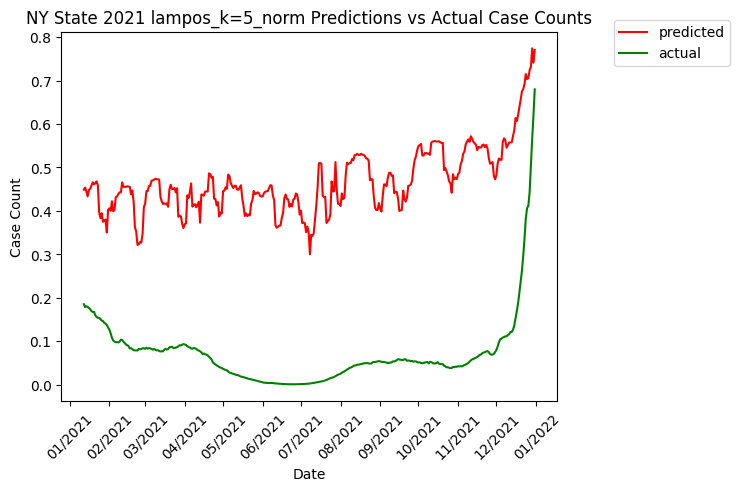

{'rmse': 11870.533948636375,
 'dtw distance': 116.93771163721806,
 'pearson statistic': 0.42712264629895913,
 'pearson p-value': 2.140437981579918e-17,
 'spearman rho': 0.1923241261453687,
 'spearman p-value': 0.0002418602993985313}

In [17]:
k = 5
exp_name = "lampos_k={}_norm".format(k)
case_values = case_data[k:].to_numpy().flatten()
denoise_rsv, rsv = extended_lampos(k=k)
results_5_df = get_model_results(
    denoise_rsv, case_values, exp_name, media=True, save=True
)
results_5_df["predicted_case_count"] = (
    MinMaxScaler().fit_transform(results_5_df[["predicted_case_count"]]).flatten()
)
results_5_df["actual_case_count"] = (
    MinMaxScaler().fit_transform(results_5_df[["actual_case_count"]]).flatten()
)
plot_predictions_actual(results_5_df, exp_name, rolling=True)
run_eval_suite_default(denoise_rsv, case_values)

/Users/andrewchen/VSCodeProjects/epi-project/modules/plot.py:254: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  df.rolling(rolling_window).mean(),
/Users/andrewchen/VSCodeProjects/epi-project/modules/plot.py:254: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  df.rolling(rolling_window).mean(),
/Users/andrewchen/VSCodeProjects/epi-project/modules/plot.py:254: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  df.rolling(roll

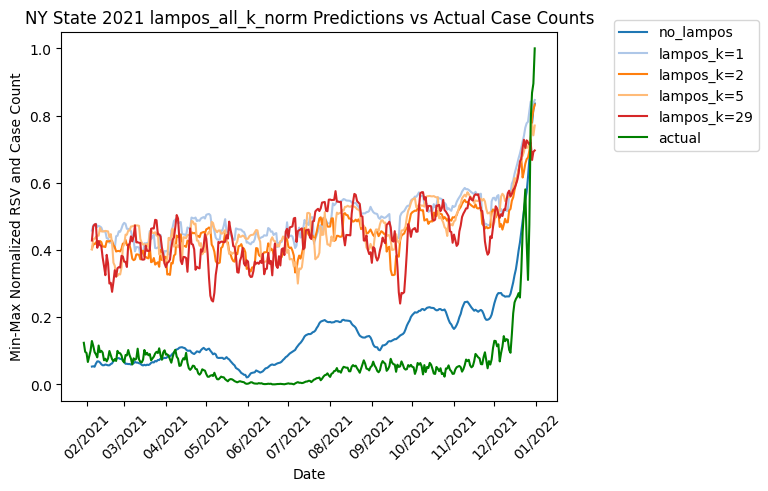

In [18]:
plot_multiple_predictions_actual(
    # Because each results_df has a different date range, we need to slice the date range to match the one with the smallest time window (results_29_df)
    [
        base_results_df[29:],
        results_1_df[28:],
        results_2_df[27:],
        results_5_df[24:],
        results_29_df,
    ],
    ["no_lampos", "lampos_k=1", "lampos_k=2", "lampos_k=5", "lampos_k=29"],
    plot_name="lampos_all_k_norm",
    rolling=True,
    ylabel="Min-Max Normalized RSV and Case Count",
)

/Users/andrewchen/VSCodeProjects/epi-project/modules/plot.py:254: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  df.rolling(rolling_window).mean(),
/Users/andrewchen/VSCodeProjects/epi-project/modules/plot.py:254: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  df.rolling(rolling_window).mean(),
/Users/andrewchen/VSCodeProjects/epi-project/modules/plot.py:254: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  df.rolling(roll

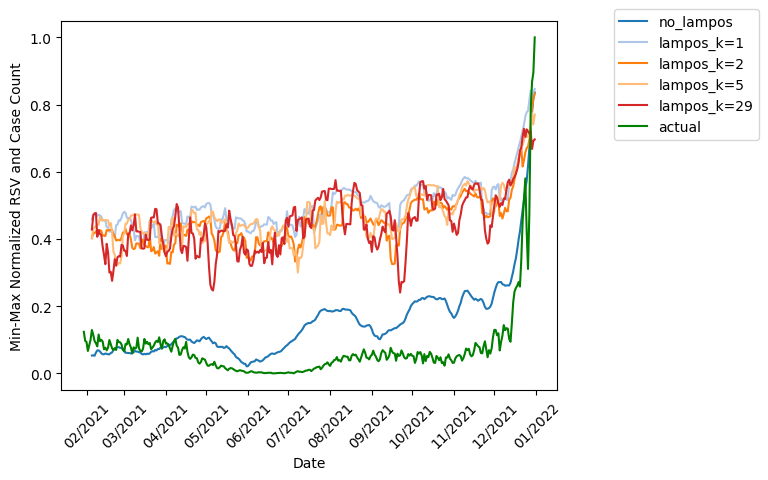

In [19]:
plot_multiple_predictions_actual(
    # Because each results_df has a different date range, we need to slice the date range to match the one with the smallest time window (results_29_df)
    [
        base_results_df[29:],
        results_1_df[28:],
        results_2_df[27:],
        results_5_df[24:],
        results_29_df,
    ],
    ["no_lampos", "lampos_k=1", "lampos_k=2", "lampos_k=5", "lampos_k=29"],
    plot_name="lampos_all_k_norm_no_title",
    rolling=True,
    ylabel="Min-Max Normalized RSV and Case Count",
    set_title=False,
)

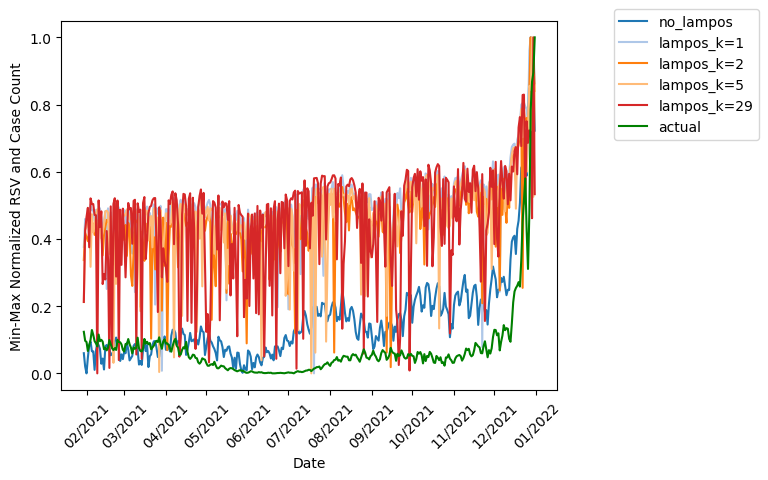

In [20]:
plot_multiple_predictions_actual(
    # Because each results_df has a different date range, we need to slice the date range to match the one with the smallest time window (results_29_df)
    [
        base_results_df[29:],
        results_1_df[28:],
        results_2_df[27:],
        results_5_df[24:],
        results_29_df,
    ],
    ["no_lampos", "lampos_k=1", "lampos_k=2", "lampos_k=5", "lampos_k=29"],
    plot_name="lampos_all_k_norm_no_title_no_smooth",
    rolling=False,
    ylabel="Min-Max Normalized RSV and Case Count",
    set_title=False,
)